In [2]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Читаем данные. Из особенностей датасета: использование запятой вместо точки в float значениях, -200 для na.

In [3]:
df = pd.read_csv("AirQualityUCI.csv", delimiter=';', decimal=',', na_values=[-200, "-200,0"])

In [4]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Удаляем две последних пустых колонки

In [6]:
df = df.iloc[:, :-2]

Посмотрим на целевую переменную:

In [7]:
df["C6H6(GT)"].describe()

count    8991.000000
mean       10.083105
std         7.449820
min         0.100000
25%         4.400000
50%         8.200000
75%        14.000000
max        63.700000
Name: C6H6(GT), dtype: float64

Выведем информацию об отсутствующих значениях.

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
total

NMHC(GT)         8443
CO(GT)           1683
NO2(GT)          1642
NOx(GT)          1639
AH                366
RH                366
T                 366
PT08.S5(O3)       366
PT08.S4(NO2)      366
PT08.S3(NOx)      366
PT08.S2(NMHC)     366
C6H6(GT)          366
PT08.S1(CO)       366
Time                0
Date                0
dtype: int64

Довольно подозрительны повторяющиеся 366 пропусков, очень похоже что это одни и те же строки.

In [9]:
df[df['C6H6(GT)'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,01/04/2004,14.00.00,1.7,NaN,222.0,NaN,NaN,99.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN
525,01/04/2004,15.00.00,1.9,NaN,197.0,NaN,NaN,108.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN
526,01/04/2004,16.00.00,2.3,NaN,319.0,NaN,NaN,131.0,NaN,93.0,NaN,NaN,NaN,NaN,NaN
701,08/04/2004,23.00.00,2.0,NaN,137.0,NaN,NaN,129.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN
702,09/04/2004,00.00.00,2.4,NaN,189.0,NaN,NaN,154.0,NaN,109.0,NaN,NaN,NaN,NaN,NaN
703,09/04/2004,01.00.00,1.8,NaN,159.0,NaN,NaN,118.0,NaN,97.0,NaN,NaN,NaN,NaN,NaN
704,09/04/2004,02.00.00,1.0,NaN,80.0,NaN,NaN,69.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN
705,09/04/2004,03.00.00,1.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,09/04/2004,04.00.00,1.0,NaN,87.0,NaN,NaN,97.0,NaN,79.0,NaN,NaN,NaN,NaN,NaN
707,09/04/2004,05.00.00,0.9,NaN,79.0,NaN,NaN,145.0,NaN,84.0,NaN,NaN,NaN,NaN,NaN


Как можем увидеть, у всех этих записей отсутствуют ground truth наблюдения, есть только усредненные показания датчиков. - уберем эти записи 

In [10]:
df = df.drop(df.loc[df['C6H6(GT)'].isnull()].index)
total = df.isnull().sum().sort_values(ascending=False)
total

NMHC(GT)         8104
CO(GT)           1647
NO2(GT)          1598
NOx(GT)          1595
AH                  0
RH                  0
T                   0
PT08.S5(O3)         0
PT08.S4(NO2)        0
PT08.S3(NOx)        0
PT08.S2(NMHC)       0
C6H6(GT)            0
PT08.S1(CO)         0
Time                0
Date                0
dtype: int64

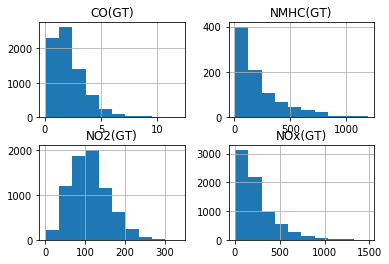

In [11]:
_ = df[['NMHC(GT)', 'CO(GT)', 'NO2(GT)', 'NOx(GT)']].hist()

NMHC(GT) - очень много отсутствующих значений. Судя по распределению, ненулевых значений не так много, заполним пропуски нулями.
Заполнение других распределений может их изменить, посмотрим сколько всего таких записей 

In [12]:
df[df['CO(GT)'].isnull() | df['NO2(GT)'].isnull() | df['NOx(GT)'].isnull()].count()


Date             2050
Time             2050
CO(GT)            403
PT08.S1(CO)      2050
NMHC(GT)           60
C6H6(GT)         2050
PT08.S2(NMHC)    2050
NOx(GT)           455
PT08.S3(NOx)     2050
NO2(GT)           452
PT08.S4(NO2)     2050
PT08.S5(O3)      2050
T                2050
RH               2050
AH               2050
dtype: int64

Примерно четверть от датасета. Заполним значения медианными.

In [13]:
df.fillna({'NMHC(GT)': 0}, inplace=True)
df.fillna(df.median(), inplace=True)

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
total

AH               0
RH               0
T                0
PT08.S5(O3)      0
PT08.S4(NO2)     0
NO2(GT)          0
PT08.S3(NOx)     0
NOx(GT)          0
PT08.S2(NMHC)    0
C6H6(GT)         0
NMHC(GT)         0
PT08.S1(CO)      0
CO(GT)           0
Time             0
Date             0
dtype: int64

Целевая переменная:

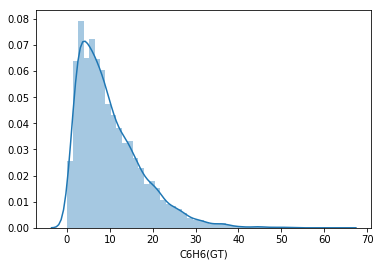

In [15]:
sns.distplot(df['C6H6(GT)']);


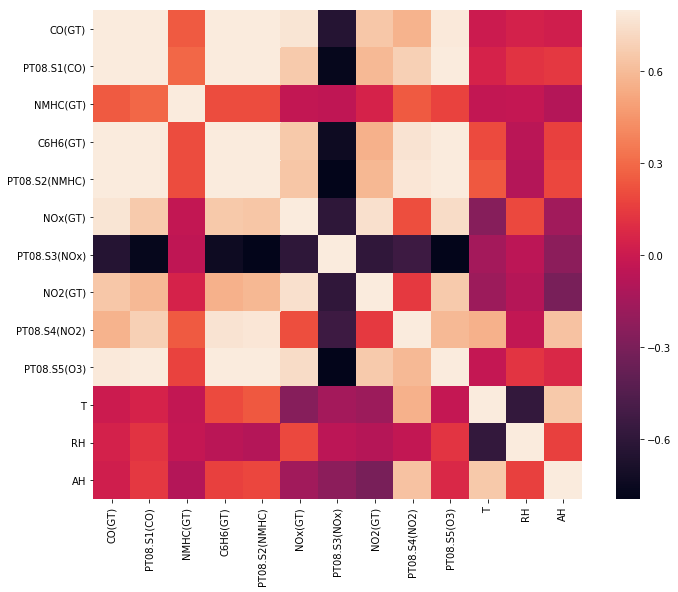

In [16]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Выведем матрицу для признаков с наибольшей корреляцией с целевым

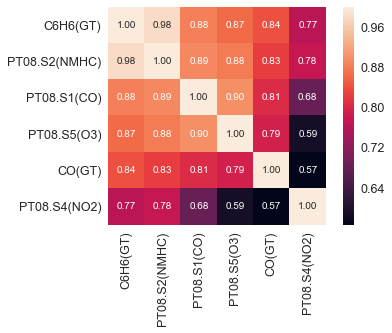

In [17]:
k = 6
cols = corrmat.nlargest(k, 'C6H6(GT)')['C6H6(GT)'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Также смотрим scatterplot

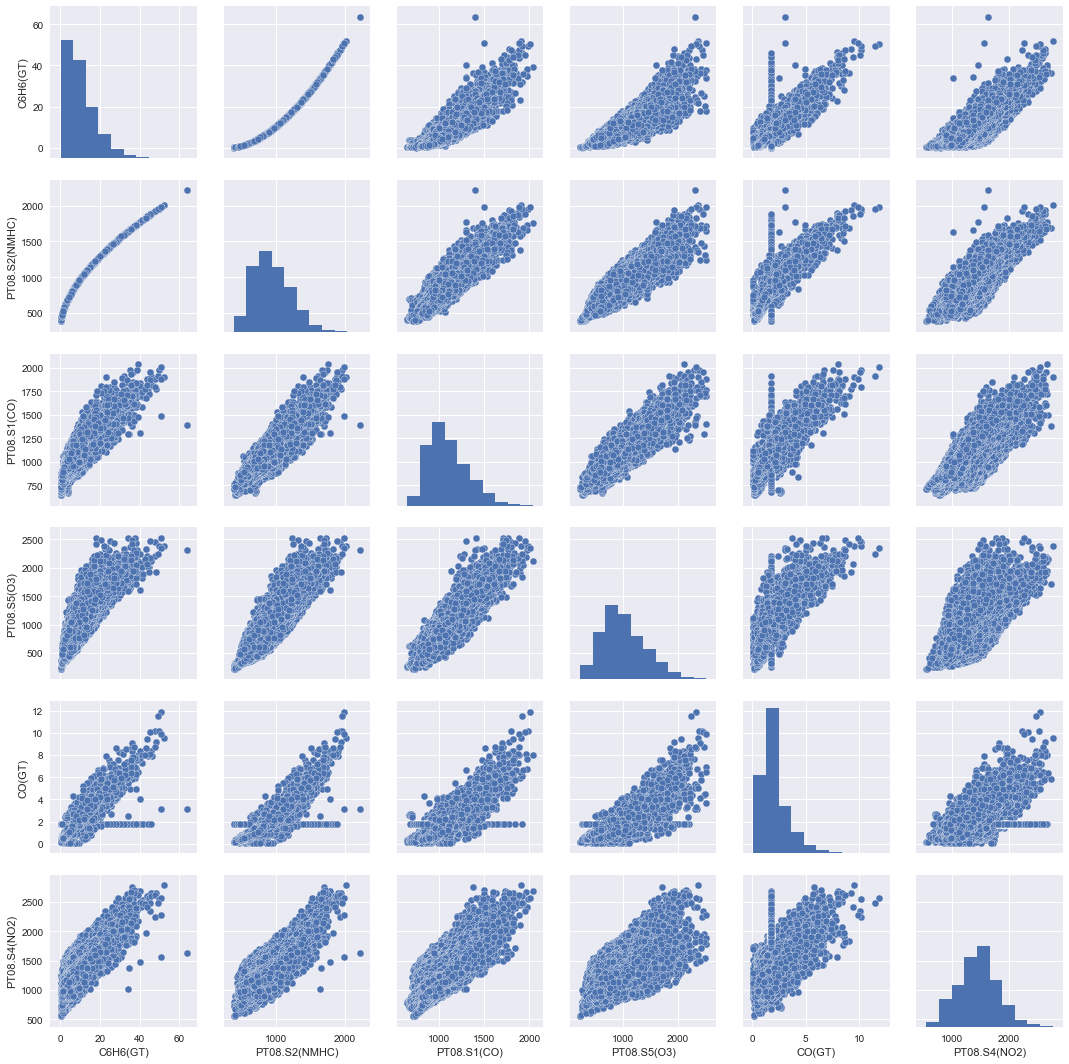

In [18]:
sns.set()
sns.pairplot(df[cols], size = 2.5)
plt.show();

Из интересного:
- зависимость от NMHC датчика видна невооруженным глазом. В ней проглядывается некоторая нелинейность, можно добавить квадрат признака как отдельный.
- в CO(GT) хорошо заметна группа медианных значений, может повлиять на модель.
- В целом, линейная зависимость относительно целевого более-менее видна для на всех графиках

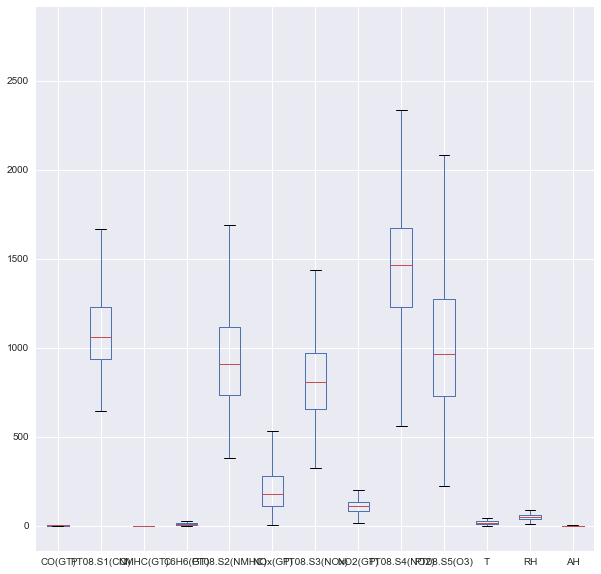

In [19]:
_ = df.boxplot(figsize=[10,10])

На боксплотах не видно сильных выбросов, но заметна разница в размерностях. Стандартизируем данные:

In [20]:
from sklearn.preprocessing import StandardScaler

#standardizing data
target_scaled = StandardScaler().fit_transform(df['C6H6(GT)'][:,np.newaxis]);
low_range = target_scaled[target_scaled[:,0].argsort()][:10]
high_range= target_scaled[target_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.3401211 ]
 [-1.3401211 ]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]]

outer range (high) of the distribution:
[[5.02280285]
 [5.04965063]
 [5.11677009]
 [5.27785677]
 [5.29128066]
 [5.43894345]
 [5.45236734]
 [5.46579123]
 [5.6403018 ]
 [7.19747307]]


У целевой переменной есть некоторые аномалии сверху. Посмотрим в связке с самым коррелирующим параметром

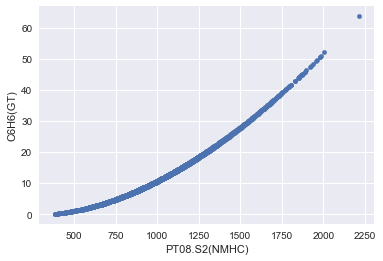

In [21]:
#bivariate analysis 
var = 'PT08.S2(NMHC)'
data = pd.concat([df['C6H6(GT)'], df[var]], axis=1)
data.plot.scatter(x=var, y='C6H6(GT)');

Группа значений чуть-чуть отрывается от общей группы(5 сигм), одна точка сильно оторвалась(7 сигм). Удалим её.

In [22]:
index = df.sort_values(by = 'PT08.S2(NMHC)', ascending = False)[:1].index[0]
df = df.drop(index)


Распарсим дату на новые признаки. От года особо смысла нет с точки зрения предсказания новых данных, а для месяца, дня и часа, применим One-Hot encoding.

In [23]:
df["day"] = df["Date"].apply(lambda x: x[:2])
df["month"] = df["Date"].apply(lambda x: x[3:5])
df["hour"] = df["Time"].apply(lambda x: x[:2])
df[['day','month','hour']] = df[['day','month','hour']].apply(pd.to_numeric)


In [24]:
df_ohe = pd.concat([df,pd.get_dummies(df['day'], prefix='day')],axis=1)
df_ohe = pd.concat([df_ohe,pd.get_dummies(df['month'], prefix='month')],axis=1)
df_ohe = pd.concat([df_ohe,pd.get_dummies(df['hour'], prefix='hour')],axis=1)
df_ohe.drop(['day', 'month', 'hour'],axis=1, inplace=True)


In [25]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,day,month,hour
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,18
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,19
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,20
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,21
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,22
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,10,3,23
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,11,3,0
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,11,3,1
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,11,3,2
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,178.0,1705.0,109.0,1235.0,501.0,10.3,60.2,0.7517,11,3,3


Попробуем обучить данные на линейной регрессии. Будем использовать метрики r2 для сравнения моделей с одинаковым количеством фич и nmse разных.

In [26]:
y = df["C6H6(GT)"]
X = df.drop(columns=["C6H6(GT)", "Date", "Time"])
# X['PT08.S2(NMHC)^2'] = X['PT08.S2(NMHC)'].apply(lambda x: x * x)

In [27]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [28]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

model = linear_model.LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='neg_mean_squared_error')
print("nmse: " + str(scores.mean()))
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='r2')
print("r2: " + str(scores.mean()))


nmse: -8.46136563275437
r2: 0.8124354458336163


In [29]:
import operator
model.fit(X_scaled, y)
coefs = model.coef_
coefs_dict = dict(zip(X.columns, coefs))
sorted_dict = sorted(coefs_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict

[('PT08.S2(NMHC)', 7.695587929876985),
 ('PT08.S3(NOx)', 0.9729225466194307),
 ('AH', 0.5891917683768066),
 ('CO(GT)', 0.5245384743625633),
 ('PT08.S1(CO)', 0.3778172851536934),
 ('NOx(GT)', 0.37179761018945834),
 ('day', 0.04609647522056548),
 ('PT08.S4(NO2)', 0.012058366756375505),
 ('month', -0.08357076219052839),
 ('NMHC(GT)', -0.14190072094748318),
 ('hour', -0.2630471532371387),
 ('PT08.S5(O3)', -0.26959797453281853),
 ('NO2(GT)', -0.36773211780832876),
 ('RH', -0.5025898794719412),
 ('T', -0.8406856089831272)]

Добавим квадрат NMHC как признак:

In [30]:
y = df["C6H6(GT)"]
X = df.drop(columns=["C6H6(GT)", "Date", "Time"])
X['PT08.S2(NMHC)^2'] = X['PT08.S2(NMHC)'].apply(lambda x: x * x)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

model = linear_model.LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='neg_mean_squared_error')
print("nmse: " + str(scores.mean()))
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='r2')
print("r2: " + str(scores.mean()))


nmse: -0.019481915840289955
r2: 0.9996047541428108


In [31]:
import operator
model.fit(X_scaled, y)
coefs = model.coef_
coefs_dict = dict(zip(X.columns, coefs))
sorted_dict = sorted(coefs_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict

[('PT08.S2(NMHC)^2', 8.131758030895758),
 ('PT08.S3(NOx)', 0.04968835632057411),
 ('AH', 0.023804639043662035),
 ('PT08.S1(CO)', 0.015481080654164092),
 ('PT08.S5(O3)', 0.007996266490816861),
 ('CO(GT)', 0.007429758827717449),
 ('day', 0.001874520192472584),
 ('NMHC(GT)', -0.00043241394899851127),
 ('NO2(GT)', -0.002603435697637435),
 ('NOx(GT)', -0.0036935718651259775),
 ('T', -0.005849135921768056),
 ('hour', -0.006103207506388597),
 ('RH', -0.00669699250288236),
 ('month', -0.007972089327722198),
 ('PT08.S4(NO2)', -0.03924655201185823),
 ('PT08.S2(NMHC)', -0.6706659781789706)]

In [32]:
y = df_ohe["C6H6(GT)"]
X = df_ohe.drop(columns=["C6H6(GT)", "Date", "Time"])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


model = linear_model.LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='neg_mean_squared_error')
print("nmse: " + str(scores.mean()))
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='r2')
print("r2: " + str(scores.mean()))

model.fit(X_scaled, y)
coefs = model.coef_
coefs_dict = dict(zip(X.columns, coefs))
sorted_dict = sorted(coefs_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict

nmse: -2.48103023649337e+26
r2: -6.546306924920311e+24


[('day_23', 184507947145.16858),
 ('day_13', 184507947145.13614),
 ('day_18', 184507947145.12747),
 ('day_12', 184507947145.10324),
 ('day_22', 184222637455.75793),
 ('day_2', 183650482964.42313),
 ('day_21', 183363633372.4457),
 ('day_1', 183363633372.40738),
 ('day_25', 183076265657.3588),
 ('day_24', 183076265657.34076),
 ('day_14', 182499966063.25198),
 ('day_28', 181631569006.55554),
 ('day_19', 181631569006.52173),
 ('day_17', 178701864739.5573),
 ('day_11', 178109294024.4927),
 ('day_6', 177514461908.06726),
 ('day_30', 177514461908.05124),
 ('day_20', 177514461908.0511),
 ('day_15', 177514461908.0416),
 ('day_3', 177514461908.02756),
 ('day_27', 177514461908.00674),
 ('day_16', 177514461907.99725),
 ('day_5', 177216190711.58655),
 ('day_7', 177216190711.55167),
 ('day_29', 176917345580.2254),
 ('day_26', 176617923600.59988),
 ('day_4', 174809111517.0517),
 ('day_10', 172055310428.14532),
 ('day_8', 169878461514.56076),
 ('day_9', 161503000083.74338),
 ('day_31', 145365484272.38

С использованием OHE фич мы получаем вырожденную(близкую к вырожденной) матрицу в аналитичском решении. Применим  LASSO регуляризацию с подбором С.

In [60]:
from sklearn.model_selection import GridSearchCV
model = linear_model.Lasso()

Cs = [0.01, 0.1, 1, 10, 100]
clf = GridSearchCV(estimator=model, param_grid=dict(alpha=Cs), cv=4, n_jobs=2, verbose=True)
clf.fit(X_scaled, y) 

print(clf.best_score_)
print(clf.best_estimator_.alpha)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
0.9995857873483518
0.01


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.9s finished


In [61]:

coefs = clf.best_estimator_.coef_
coefs_dict = dict(zip(X.columns, coefs))
sorted_dict = sorted(coefs_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict[:5]

[('PT08.S2(NMHC)^2', 7.4904559633896515),
 ('PT08.S3(NOx)', 0.09252680242353527),
 ('NOx(GT)', 0.004572017701379583),
 ('CO(GT)', 0.0027004597689080393),
 ('PT08.S1(CO)', 0.0)]

SVM-регрессия с подбором параметра С

In [54]:
y = df["C6H6(GT)"]
X = df.drop(columns=["C6H6(GT)", "Date", "Time"])
X['PT08.S2(NMHC)^2'] = X['PT08.S2(NMHC)'].apply(lambda x: x * x)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn import svm
model = svm.SVR()

Cs = [0.1, 1]
clf = GridSearchCV(estimator=model, param_grid=dict(C=Cs), cv=4, n_jobs=2, verbose=True, scoring=['r2','neg_mean_squared_error'],
                  refit=False)
clf.fit(X_scaled, y) 

print("nmse: " + str(max(clf.cv_results_['mean_test_neg_mean_squared_error'])))
print("r2: " + str(max(clf.cv_results_['mean_test_r2'])))

Fitting 4 folds for each of 2 candidates, totalling 8 fits
nmse: -6.023698196535185
r2: 0.8985724474363003


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   14.4s finished


Стохастический градиентный спуск:

In [39]:
X = df.drop(columns=["C6H6(GT)", "Date", "Time"])
X['PT08.S2(NMHC)^2'] = X['PT08.S2(NMHC)'].apply(lambda x: x * x)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

model = linear_model.SGDRegressor(alpha=0.001,epsilon=0.1, loss='squared_loss', 
       shuffle=True,
       verbose=0)

scores = cross_val_score(model, X_scaled, y, cv=4, scoring='neg_mean_squared_error')
print("nmse: " + str(scores.mean()))
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='r2')
print("r2: " + str(scores.mean()))

nmse: -7.492783602535587
r2: 0.840438180687586


Kernel регрессия:

In [56]:
from sklearn.kernel_ridge import KernelRidge

X = df.drop(columns=["C6H6(GT)", "Date", "Time"])
X['PT08.S2(NMHC)^2'] = X['PT08.S2(NMHC)'].apply(lambda x: x * x)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

model = KernelRidge()
alphas = [0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'rbf']

clf = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas, kernel=kernels), cv=4, n_jobs=2, verbose=True, scoring=['r2','neg_mean_squared_error'],
                  refit=False)
clf.fit(X_scaled, y) 

print("nmse: " + str(max(clf.cv_results_['mean_test_neg_mean_squared_error'])))
print("r2: " + str(max(clf.cv_results_['mean_test_r2'])))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
nmse: -13.277766187717267
r2: 0.7552223255576325


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:  2.4min finished


Проанализируем остатки для модели линейной регрессии, показавшей лучший результат.

In [62]:
y = df["C6H6(GT)"]
X = df.drop(columns=["C6H6(GT)", "Date", "Time"])
X['PT08.S2(NMHC)^2'] = X['PT08.S2(NMHC)'].apply(lambda x: x * x)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

model = linear_model.LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='neg_mean_squared_error')
print("nmse: " + str(scores.mean()))
scores = cross_val_score(model, X_scaled, y, cv=4, scoring='r2')
print("r2: " + str(scores.mean()))

nmse: -0.019481915840289955
r2: 0.9996047541428108


In [65]:
model.fit(X, y)
Y_pred = model.predict(X)
residual = df["C6H6(GT)"].values-Y_pred
residual


array([-0.03783259, -0.08760771, -0.0801619 , ...,  0.03711452,
       -0.07306206, -0.00477183])

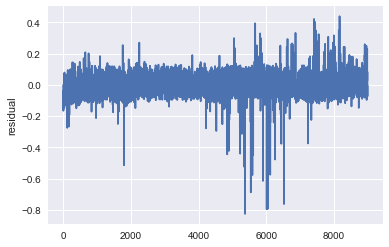

In [69]:
plt.plot(residual)
plt.ylabel("residual")
plt.show()

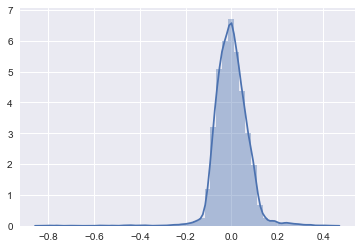

In [72]:
sns.distplot(residual)

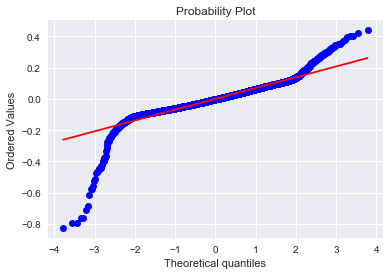

In [77]:
import pylab 
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()

Большая часть остатков нормально распределена вокруг 0.

In [96]:
import statsmodels.formula.api as sm
input = df
input = input.rename(index=str, columns={"C6H6(GT)": "Y", "PT08.S2(NMHC)": "PT_NMHC", "PT08.S3(NOx)": "PT_NOx", "CO(GT)": "COGT"})
result = sm.ols(formula='Y~PT_NMHC+PT_NOx+T+AH+RH+COGT',data=input).fit()


In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 5.953e+04
Date:                Wed, 19 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:01:36   Log-Likelihood:                -14118.
No. Observations:                8990   AIC:                         2.825e+04
Df Residuals:                    8983   BIC:                         2.830e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4421      0.171   -119.552      0.000     -20.777     -20.107
PT_NMHC        0.0290      0.000    252.986      0.000       0.029       0.029
PT_NOx         0.0041   8.24e-05     49.729      0.000       0.004       0.004
T             -0.0952      0.005    -19.132      0.000      -0.105      -0.085
AH             1.5947      0.090     17.798      0.000       1.419       1.770
RH            -0.0184      0.002     -9.634      0.000      -0.022      -0.015
COGT           0.4296      0.018     23.946      0.000       0.394       0.465
==============================================================================
Omnibus:                     3668.936   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34331.156
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                      11.948   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все P>|t| сильно малы, можно отвергнуть гиппотезы об отсутствии взаимосвязей с целевой переменной.

Из общих результатов:
- PT08.S2(NMHC)- а в особенности его квадрат сильно опережает по значимости остальные признаки, являясь основным в определении целевого.(коэффициенты в районе 7-9)
- Все модели подтверждают данный результат, в основном различаясь только в значимости остальных признаков.
- Из относительно общих полезных признаков: ('RH', -0.5025898794719412), ('T', -0.8406856089831272) - оба имеют обратные достаточно большие по модулю относительно остальных коэффициенты.
- PT08.S3(NOx) - второй по значимости из положительных.(0.68)
- В целом усредненные показания с датчиков оказались полезнее информации прямого наблюдения.
- Линейная модель показала себя хорошо без доп признаков, при добавлении новых, лучше показали себя модели  SVR, Kernel.